The Entire Code is availble below:

131 65
Epoch 1/200
0s - loss: 20245329.5972
Epoch 2/200
0s - loss: 374464.6488
Epoch 3/200
0s - loss: 264033.7337
Epoch 4/200
0s - loss: 372805.4724
Epoch 5/200
0s - loss: 282565.4492
Epoch 6/200
0s - loss: 320115.9123
Epoch 7/200
0s - loss: 313731.8684
Epoch 8/200
0s - loss: 282828.8572
Epoch 9/200
0s - loss: 360375.1743
Epoch 10/200
0s - loss: 356799.6563
Epoch 11/200
0s - loss: 313445.2819
Epoch 12/200
0s - loss: 342645.0982
Epoch 13/200
0s - loss: 329417.0710
Epoch 14/200
0s - loss: 410035.2839
Epoch 15/200
0s - loss: 409741.0223
Epoch 16/200
0s - loss: 304140.0261
Epoch 17/200
0s - loss: 479457.7771
Epoch 18/200
0s - loss: 309393.5499
Epoch 19/200
0s - loss: 355183.0043
Epoch 20/200
0s - loss: 363788.5264
Epoch 21/200
0s - loss: 364634.6234
Epoch 22/200
0s - loss: 455430.8947
Epoch 23/200
0s - loss: 370157.5955
Epoch 24/200
0s - loss: 463085.8650
Epoch 25/200
0s - loss: 558415.8044
Epoch 26/200
0s - loss: 389131.7010
Epoch 27/200
0s - loss: 280204.2032
Epoch 28/200
0s - loss: 2528

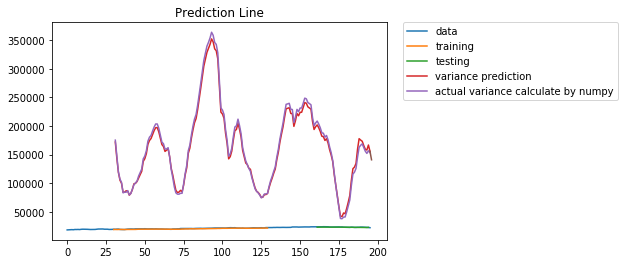

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas
import math

from pandas import Series , DataFrame, Panel
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics

np.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('C:\\Users\\tcheng\\Documents\HSI1.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


model = Sequential()
model.add(Dense(30,input_dim=look_back, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))



trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

f, axarr = plt.subplots(sharex=True,squeeze=False)

axarr = axarr.flatten()


axarr[0].plot(dataset , label = 'data')
axarr[0].plot(trainPredictPlot,label = 'training')
axarr[0].plot(testPredictPlot, label = 'testing')


#plt.plot(futurePredictPlot)
axarr[0].set_title('Prediction Line')

def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)






predictionX , PredictionY = create_dataset(dataset,look_back)
prestack1 ,prestack2  = predictionX, PredictionY
datatodate = prestack1
np.delete(prestack1,look_back-1,axis =1)

#varPrep = np.hstack((prestack1,prestack2))
#varPrep2 = np.hstack((prestack1,prestack3))
prediction = model.predict(predictionX)

value = np.hstack((prestack1,prediction))
var  = np.empty(len(dataset))
var  [:] = np.nan
var [look_back+1:]= np.var(value,axis = 1,)

Rvar  = np.empty(len(dataset))
Rvar  [:] = np.nan
Rvar [look_back+1:]= np.var(prestack1, axis=1)




#axarr[0].plot(np.var(varPrep,axis=1), label = 'variance prediction for training data')
#axarr[0].plot(np.var(varPrep2,axis=1),label = 'variance prediction for testing data')
axarr[0].plot( var,label = "variance prediction")
axarr[0].plot(Rvar, label = 'actual variance calculate by numpy')
axarr[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#Data = Series(dataset, index = dates)
#Series.rolling(Data,window=3,center=False).mean().plot(style='b--')
#Series.rolling(Data,window=3,center=False).var().plot(style='r--')
#Data.plot(style='k'


Pvar = np.empty(len(dataset))
Pvar[:]=np.nan
Pvar[-1] = var[-1]
Pvar= np.append(Pvar,np.var(np.append(dataset[-30:-1],model.predict(dataset[-31:-1].T))))

axarr[0].plot(Pvar)
#axarr[1].plot(error)
#axarr[1].set_title('Error ')
#axarr[1].axhline(0, color='black')
plt.show()
